In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [67]:
bg = cv2.imread("backGroundLarge.jpg")
fg = cv2.imread("foreGroundAssetLarge.png",-1)

In [41]:
print("---Background Info---")
print(bg.ndim)
print(bg.shape)
print("---Foregrounf Info---")
print(fg.ndim)
print(fg.shape)

---Background Info---
3
(1056, 1500, 3)
---Foregrounf Info---
3
(1056, 1500, 4)


In [4]:
b, g, r, a = cv2.split(fg)

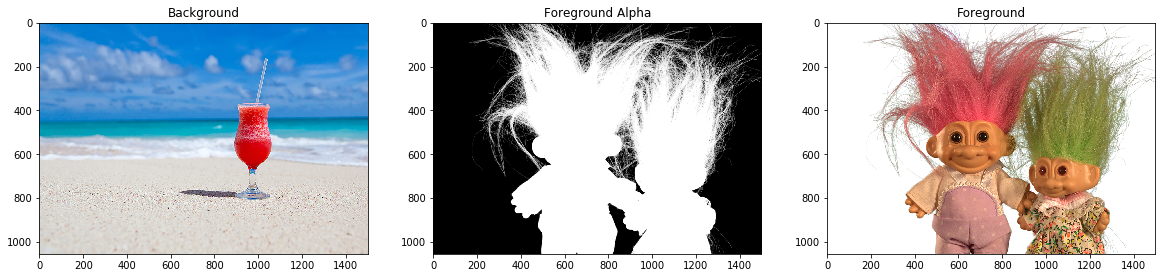

In [68]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1);plt.title("Background");plt.imshow(bg[:,:,::-1])
plt.subplot(1,3,2);plt.title("Foreground Alpha");plt.imshow(a,'gray')
plt.subplot(1,3,3);plt.title("Foreground");plt.imshow(fg[:,:,[2,1,0,3]])

In [69]:
alpha = cv2.merge((a,a,a))
fore_bgr = cv2.merge((b,g,r))

In [70]:
fore_bgr = fore_bgr.astype('float')
alpha = alpha / 255.0

In [71]:
bg = bg.astype('float')

In [72]:
fore_final = cv2.multiply(alpha, fore_bgr)
back_final = cv2.multiply(1.0 - alpha, bg)
outImage = cv2.add(fore_final, back_final)

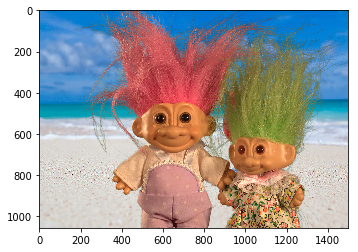

In [73]:
plt.imshow(outImage[:,:,::-1]/255)